In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
train_data=pd.read_csv('/content/gdrive/My Drive/fraudTrain.csv')

In [4]:
test_data=pd.read_csv('/content/gdrive/My Drive/fraudTest.csv')

# Preprocessing

In [5]:
import pandas as pd

print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

In [6]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state   

In [7]:
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state   

In [8]:

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Data Visualisation

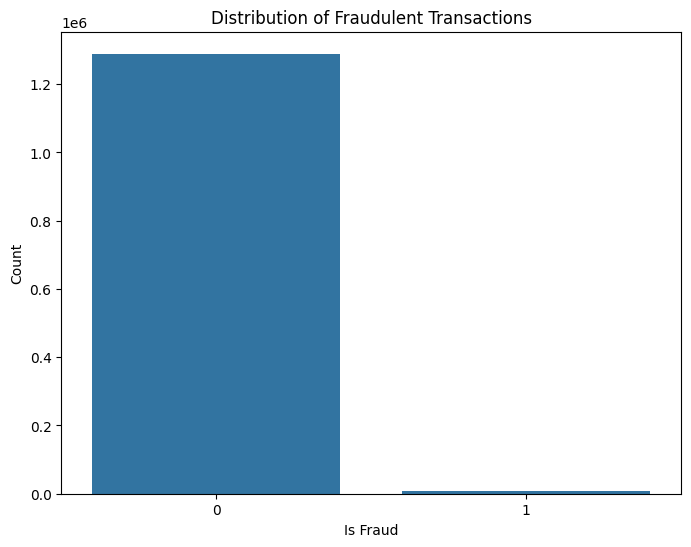

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_target_distribution(df, column, title='Distribution of Target', xlabel='Target', ylabel='Count'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.savefig("/Users/jasmikavemulapalli/Downloads/creditcard/FraudulentTransactions.png")

    plt.show()

plot_target_distribution(
    df=train_data,
    column='is_fraud',
    title='Distribution of Fraudulent Transactions',
    xlabel='Is Fraud',
    ylabel='Count'
)


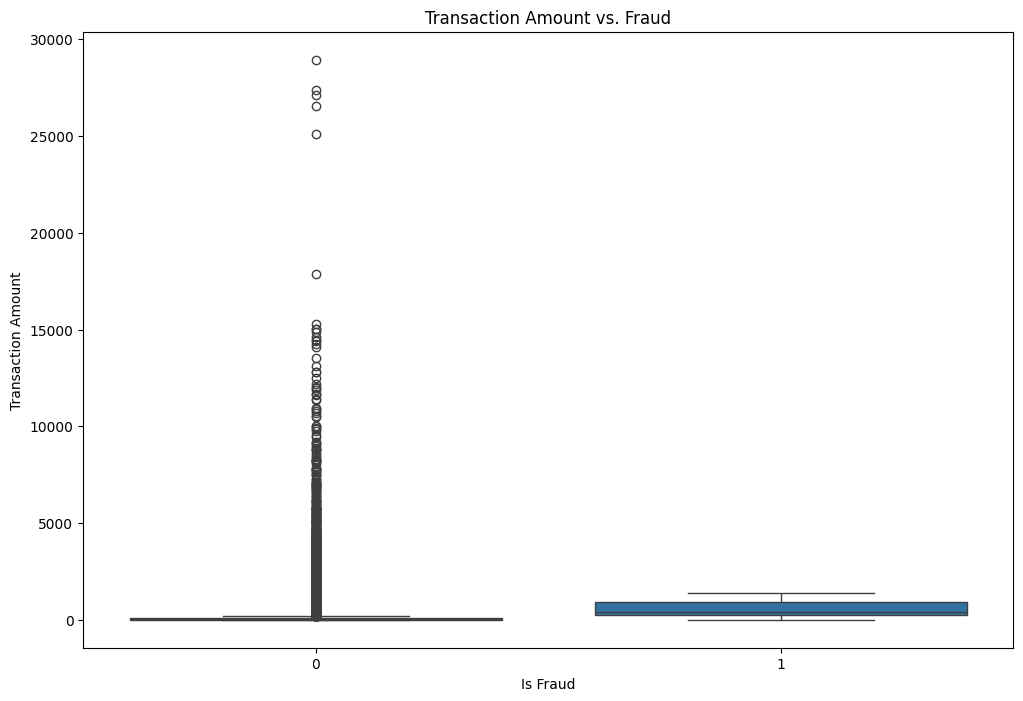

In [9]:
def plot_transaction_amount_vs_fraud(df, fraud_column, amount_column, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=fraud_column, y=amount_column, data=df)
    plt.title('Transaction Amount vs. Fraud')
    plt.xlabel('Is Fraud')
    plt.ylabel('Transaction Amount')
    #plt.savefig("/Users/user/Documents/real world/is_fraud.png")

    plt.show()

plot_transaction_amount_vs_fraud(train_data, 'is_fraud', 'amt')


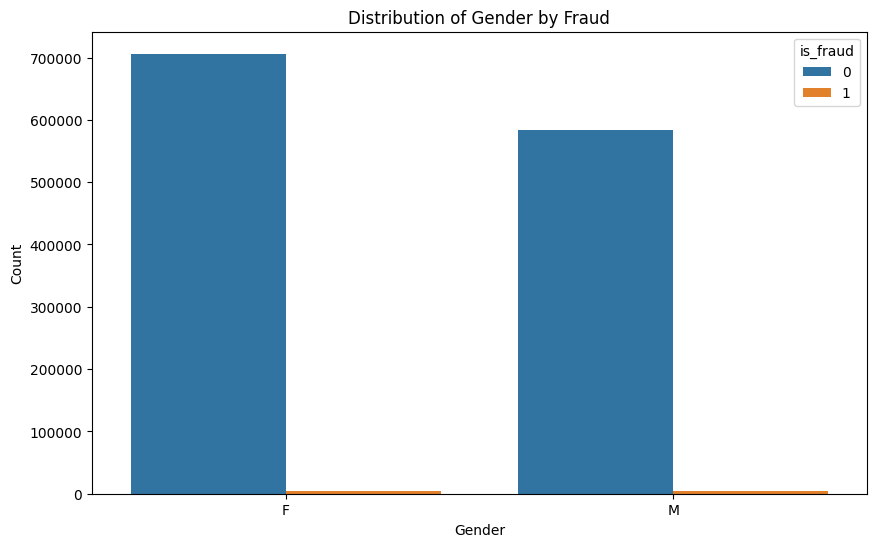

In [10]:
def plot_categorical_distribution(df, category_column, target_column, figsize=(10, 6), title='Distribution by Category and Target', xlabel=None, ylabel='Count'):
    plt.figure(figsize=figsize)
    sns.countplot(x=category_column, hue=target_column, data=df)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else category_column)
    plt.ylabel(ylabel)
    plt.legend(title=target_column)
    #plt.savefig("/Users/user/Documents/real world/Gender_by_Fraud.png")

    plt.show()

plot_categorical_distribution(
    df=train_data,
    category_column='gender',
    target_column='is_fraud',
    title='Distribution of Gender by Fraud',
    xlabel='Gender'
)


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


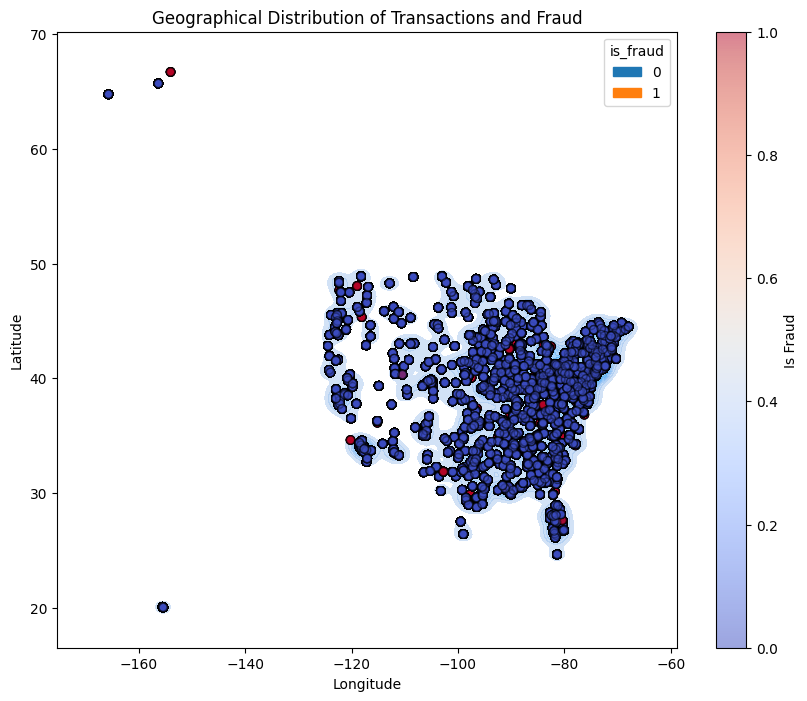

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_geographical_distribution(df, longitude, latitude, target, figsize=(10, 8), title='Geographical Distribution of Transactions and Fraud'):
    # Create the scatter plot with a KDE overlay
    plt.figure(figsize=figsize)
    # Plot the KDE
    sns.kdeplot(x=df[longitude], y=df[latitude], hue=df[target], fill=True, cmap='coolwarm', alpha=0.5)
    # Plot the actual points
    plt.scatter(df[longitude], df[latitude], c=df[target], cmap='coolwarm', alpha=0.5, edgecolor='k')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # Create a color bar
    plt.colorbar(label='Is Fraud')
    #plt.savefig("/Users/user/Documents/real world/Geographical_Distribution.png")
    plt.show()

# Call the function with the appropriate columns
plot_geographical_distribution(
    df=train_data,
    longitude='long',
    latitude='lat',
    target='is_fraud',
    title='Geographical Distribution of Transactions and Fraud'
)


<Figure size 1200x600 with 0 Axes>

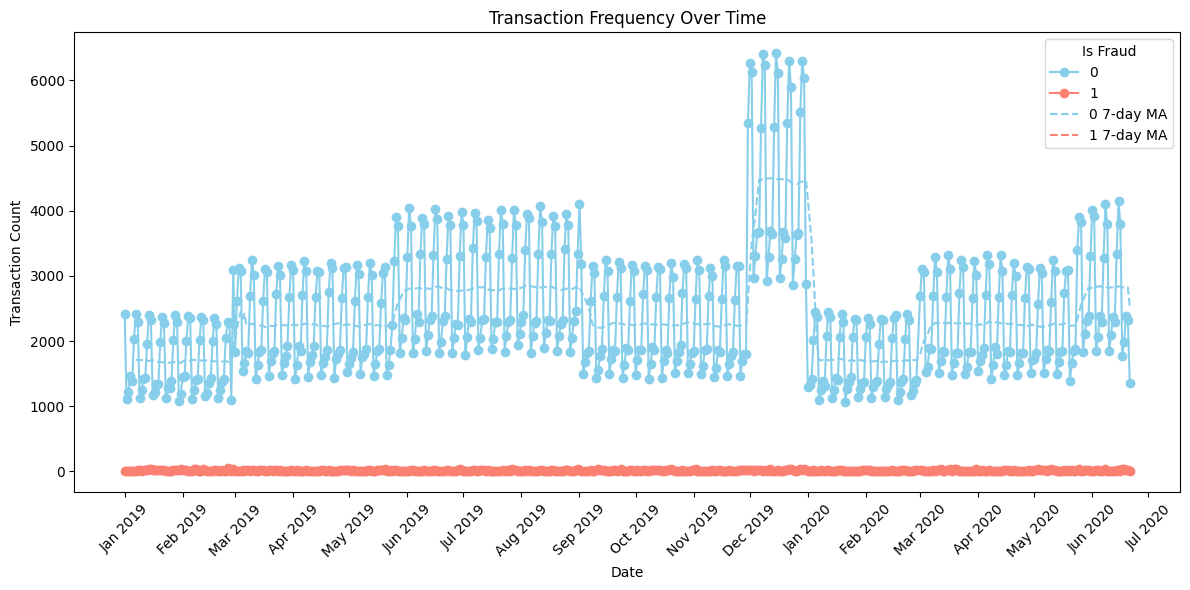

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_transaction_frequency(df, date_time_column, target_column, figsize=(12, 6), title='Transaction Frequency Over Time'):
    plt.figure(figsize=figsize)
    df[date_time_column] = pd.to_datetime(df[date_time_column])
    df['trans_date'] = df[date_time_column].dt.date

    transaction_counts = df.groupby(['trans_date', target_column]).size().unstack(fill_value=0)

    colors = ['skyblue', 'salmon']  # Non-fraud transactions in blue, fraud in red
    transaction_counts.plot(kind='line', color=colors, style='-o', figsize=figsize)

    window = 7  # 7-day moving average
    for column, color in zip(transaction_counts.columns, colors):
        plt.plot(transaction_counts.index, transaction_counts[column].rolling(window=window).mean(),
                 color=color, linestyle='dashed', label=f'{column} {window}-day MA')

    # Formatting the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Transaction Count')
    plt.legend(title='Is Fraud')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show month start as tick
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format date as 'Month Year'
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    # Adjust layout to prevent clipping of tick-labels
    #plt.savefig("/Users/user/Documents/real world/Transaction_Frequency.png")
    plt.show()

# Call the function with the appropriate columns
plot_transaction_frequency(
    df=train_data,
    date_time_column='trans_date_trans_time',
    target_column='is_fraud',
    title='Transaction Frequency Over Time'
)


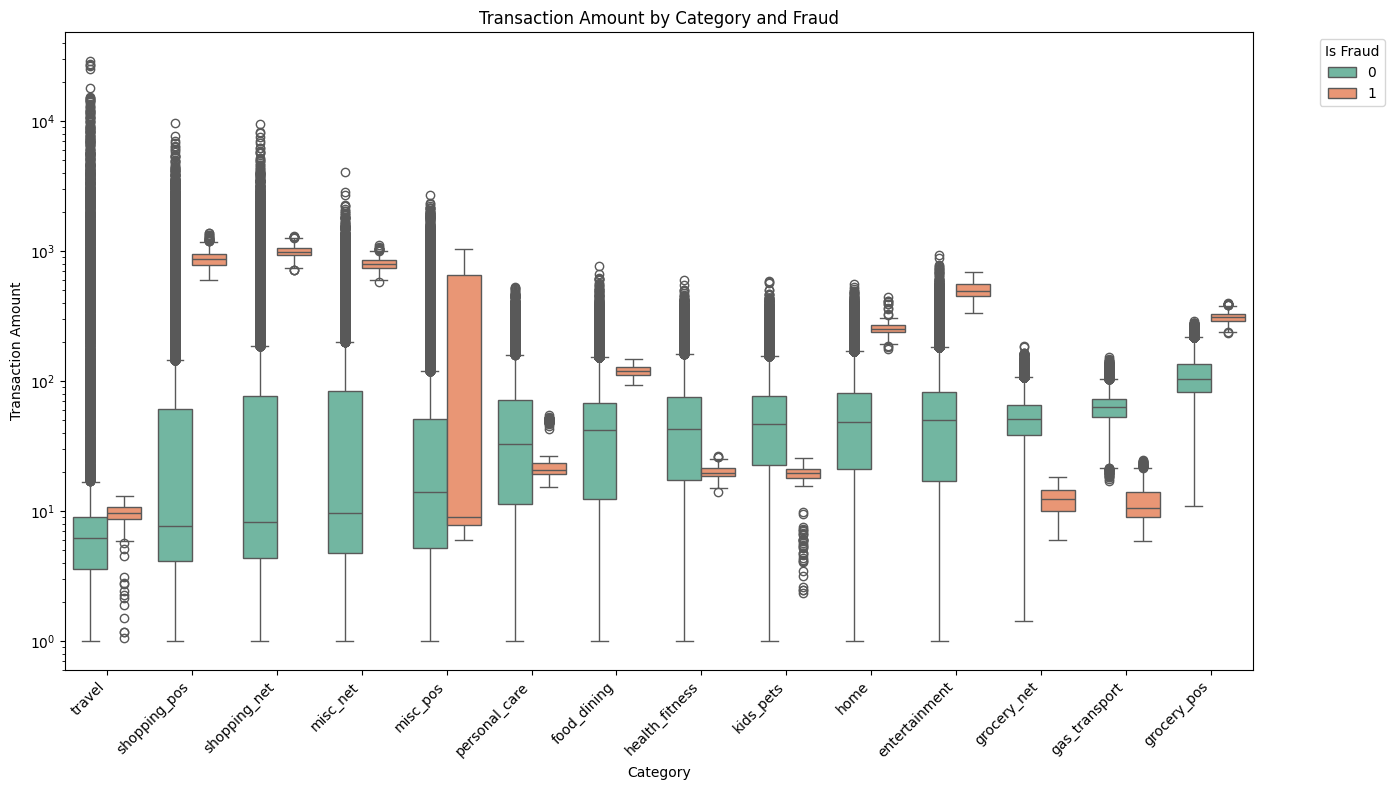

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_transaction_amount_by_category(df, category_col, amount_col, hue_col, figsize=(14, 8), title='Transaction Amount by Category and Fraud'):
    # Prepare the figure
    plt.figure(figsize=figsize)

    # Calculate medians to order the categories
    ordered_categories = df.groupby([category_col])[amount_col].median().sort_values().index

    # Create the boxplot with specified hue and order
    sns.boxplot(x=category_col, y=amount_col, hue=hue_col, data=df, order=ordered_categories, palette='Set2')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Transaction Amount')

    # Improve the x-tick labels
    plt.xticks(rotation=45, ha="right")

    # Optionally, set the y-axis to a logarithmic scale
    plt.yscale('log')

    # Adjust the legend
    plt.legend(title='Is Fraud', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Tight layout for better spacing
    plt.tight_layout()

    # Display the plot
    #plt.savefig("/Users/user/Documents/real world/Transaction_Amount_by_Category.png")
    plt.show()

# Call the function to plot the graph
plot_transaction_amount_by_category(
    df=train_data,
    category_col='category',
    amount_col='amt',
    hue_col='is_fraud',
    title='Transaction Amount by Category and Fraud'
)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


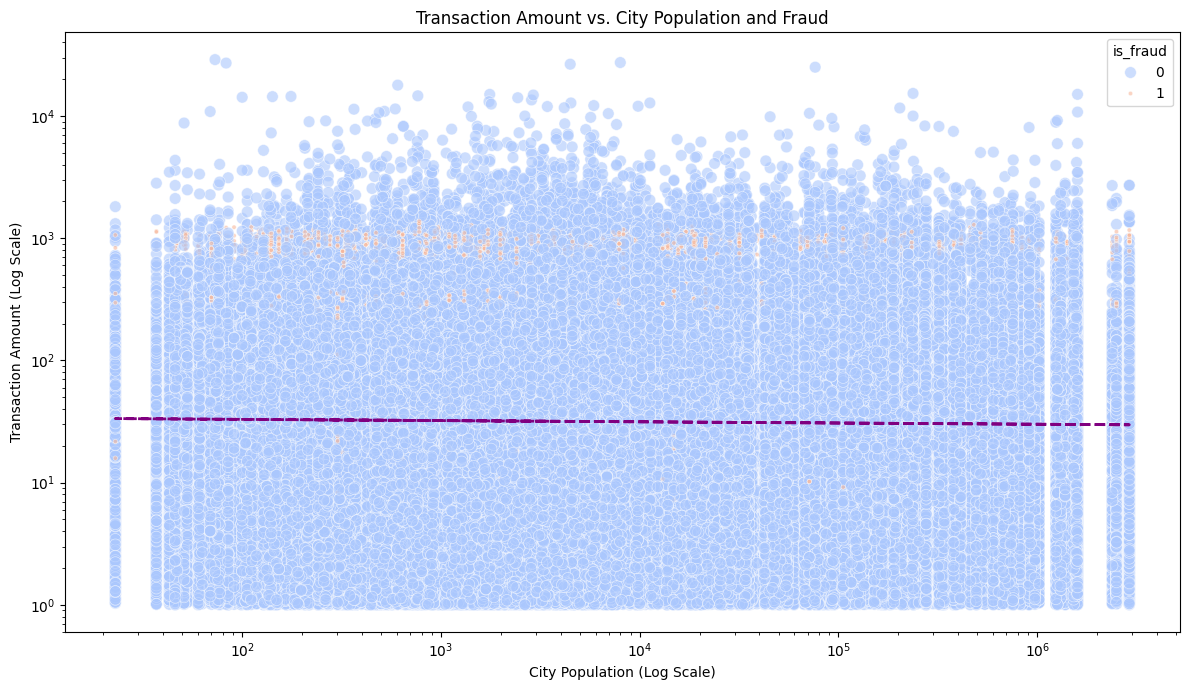

In [15]:

def plot_transaction_vs_population(df, population_col, amount_col, hue_col, figsize=(12, 7), title='Transaction Amount vs. City Population and Fraud'):
    plt.figure(figsize=figsize)

    # Use a log scale for both axes if the data spans several orders of magnitude
    plt.xscale('log')
    plt.yscale('log')

    # Set the size of the points based on the fraud status for better visibility
    size = np.where(df[hue_col] == 1, 70, 10)

    # Create a scatter plot
    sns.scatterplot(x=population_col, y=amount_col, hue=hue_col, size=df[hue_col], sizes=(10, 70),
                    data=df, palette='coolwarm', alpha=0.6, edgecolor='w', linewidth=0.5)

    # Plot a trend line using np.polyfit for log-log scale
    coeffs = np.polyfit(np.log(df[population_col]), np.log(df[amount_col]), deg=1)
    trendline = np.exp(np.polyval(coeffs, np.log(df[population_col])))
    plt.plot(df[population_col], trendline, color='purple', linestyle='dashed', linewidth=2)

    # Set title and labels
    plt.title(title)
    plt.xlabel('City Population (Log Scale)')
    plt.ylabel('Transaction Amount (Log Scale)')

    # Adjust legend to differentiate between fraud and non-fraud transactions
    plt.legend(title=hue_col, loc='upper right')

    # Display the plot
    plt.tight_layout()
    #plt.savefig("/Users/user/Documents/real world/Transaction_Amount_City_Population.png")

    plt.show()

# Call the function to plot the graph
plot_transaction_vs_population(
    df=train_data,
    population_col='city_pop',
    amount_col='amt',
    hue_col='is_fraud',
    title='Transaction Amount vs. City Population and Fraud'
)


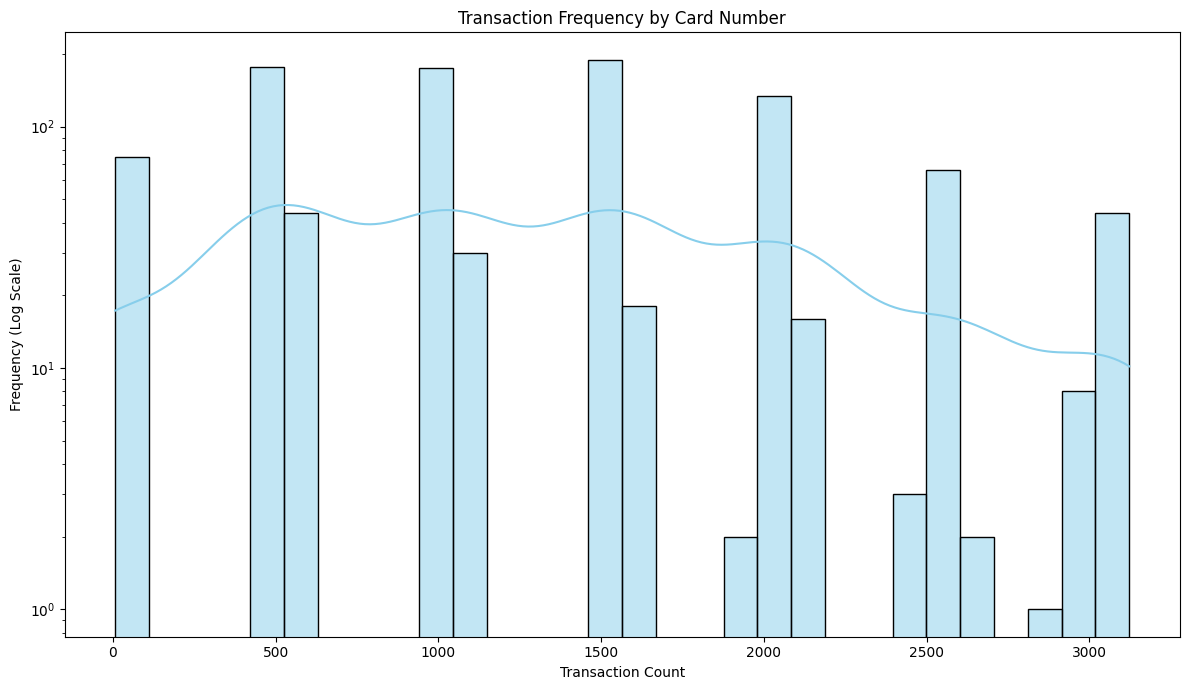

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_transaction_frequency_by_card(df, card_col, figsize=(12, 7), title='Transaction Frequency by Card Number', color='skyblue'):
    # Calculate the transaction counts by card
    card_transaction_counts = df[card_col].value_counts()

    # Initialize the plot
    plt.figure(figsize=figsize)

    # Create a histogram with Kernel Density Estimate (KDE)
    sns.histplot(card_transaction_counts, bins=30, kde=True, color=color)

    # Set a log scale for the y-axis to better display a wide range of values
    plt.yscale('log')

    # Set title and labels
    plt.title(title)
    plt.xlabel('Transaction Count')
    plt.ylabel('Frequency (Log Scale)')

    # Display the plot
    plt.tight_layout()  # Adjust the layout for better spacing
    #plt.savefig("/Users/user/Documents/real world/Transaction Frequency by Card Number.png")

    plt.show()

# Call the function to plot the graph
plot_transaction_frequency_by_card(
    df=train_data,
    card_col='cc_num',
    title='Transaction Frequency by Card Number'
)


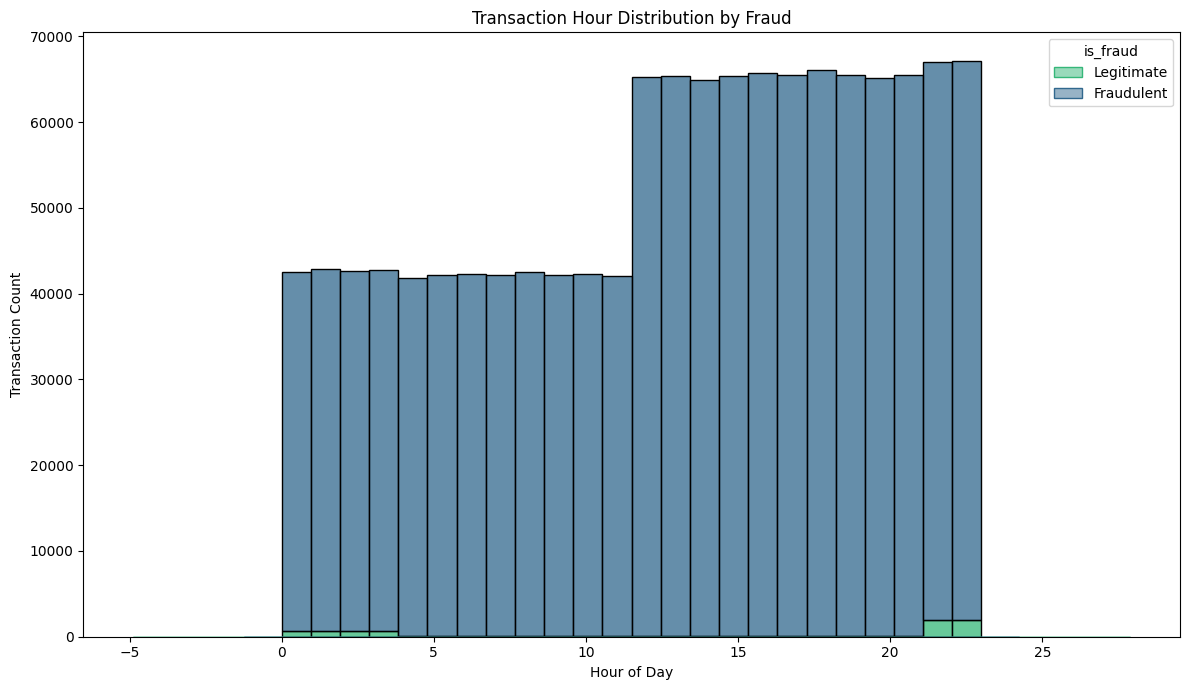

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_transaction_time_correlation(df, time_col, target_col, figsize=(12, 7), title='Transaction Hour Distribution by Fraud'):
    # Convert transaction time to hours
    df['trans_hour'] = pd.to_datetime(df[time_col]).dt.hour

    # Initialize the plot
    plt.figure(figsize=figsize)

    # Create a histogram with a density plot overlay
    sns.histplot(data=df, x='trans_hour', hue=target_col, multiple='stack', bins=24, palette='viridis', edgecolor='k')
    sns.kdeplot(data=df, x='trans_hour', hue=target_col, common_norm=False, palette='viridis', fill=True, alpha=0.5)

    # Set title and labels
    plt.title(title)
    plt.xlabel('Hour of Day')
    plt.ylabel('Transaction Count')

    # Adjust legend to clearly distinguish between fraud and legitimate
    plt.legend(title=target_col, labels=['Legitimate', 'Fraudulent'])

    # Display the plot
    plt.tight_layout()  # Adjust the layout for better spacing
    #plt.savefig("/Users/user/Documents/real world/Transaction Hour Distribution by Fraud.png")
    plt.show()

# Call the function to plot the graph
plot_transaction_time_correlation(
    df=train_data,
    time_col='trans_date_trans_time',
    target_col='is_fraud',
    title='Transaction Hour Distribution by Fraud'
)


# Feature Engineering

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

categorical_cols = ['gender', 'category', 'state']
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

def encode_categorical_features(df, categorical_columns, drop_first=True, fit_encoder=None):
    encoder = fit_encoder if fit_encoder else OneHotEncoder(drop='first' if drop_first else None)
    encoded_features = encoder.fit_transform(df[categorical_columns]) if not fit_encoder else encoder.transform(df[categorical_columns])
    return encoded_features.toarray(), encoder

def scale_numerical_features(df, numerical_columns, fit_scaler=None):
    scaler = fit_scaler if fit_scaler else StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_columns]) if not fit_scaler else scaler.transform(df[numerical_columns])
    return scaled_features, scaler


encoded_train, train_encoder = encode_categorical_features(train_data, categorical_cols)
scaled_train, train_scaler = scale_numerical_features(train_data, numerical_cols)

encoded_test, _ = encode_categorical_features(test_data, categorical_cols, fit_encoder=train_encoder)
scaled_test, _ = scale_numerical_features(test_data, numerical_cols, fit_scaler=train_scaler)

final_train_features = pd.concat([pd.DataFrame(encoded_train), pd.DataFrame(scaled_train)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test), pd.DataFrame(scaled_test)], axis=1)

# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']


# Data Augmentation using SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

def resample_data(features, target, state=42):
    # Initialize SMOTE with the given random state
    smote_resampler = SMOTE(random_state=state)
    # Resample the data
    resampled_features, resampled_target = smote_resampler.fit_resample(features, target)
    return resampled_features, resampled_target

x_train_resampled, y_train_resampled = resample_data(final_train_features, train_target, state=36)



In [21]:
X_shuffled, y_shuffled = shuffle(x_train_resampled, y_train_resampled, random_state=42)

In [22]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [23]:
def sample_training_data(features, target, sample_size):
    features_copy = features.copy()
    target_copy = target.copy()

    features_sample = features_copy[:sample_size]
    target_sample = target_copy[:sample_size]

    return features_sample, target_sample, features_copy, target_copy

# Call the function to get the sampled and the original datasets
x_train_sampled, y_train_sampled, x_train_original, y_train_original = sample_training_data(
    x_train_resampled, y_train_resampled, sample_size=10000
)



# Models Building

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_model(model, features, target):
    model.fit(features, target)
    return model

def make_predictions(trained_model, features):
    predictions = trained_model.predict(features)
    return predictions

def calculate_accuracy(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Train the Logistic Regression model
logistic_model = LogisticRegression()
trained_lg_model = train_model(logistic_model, x_train, y_train)

# Make predictions on the validation data
lg_predictions = make_predictions(trained_lg_model, x_validation)

# Calculate evaluation metrics on validation data
logistic_accuracy = calculate_accuracy(y_validation, lg_predictions)

# Print the evaluation metrics
print(f"Logistic Regression Accuracy: {logistic_accuracy:.3%}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 81.503%


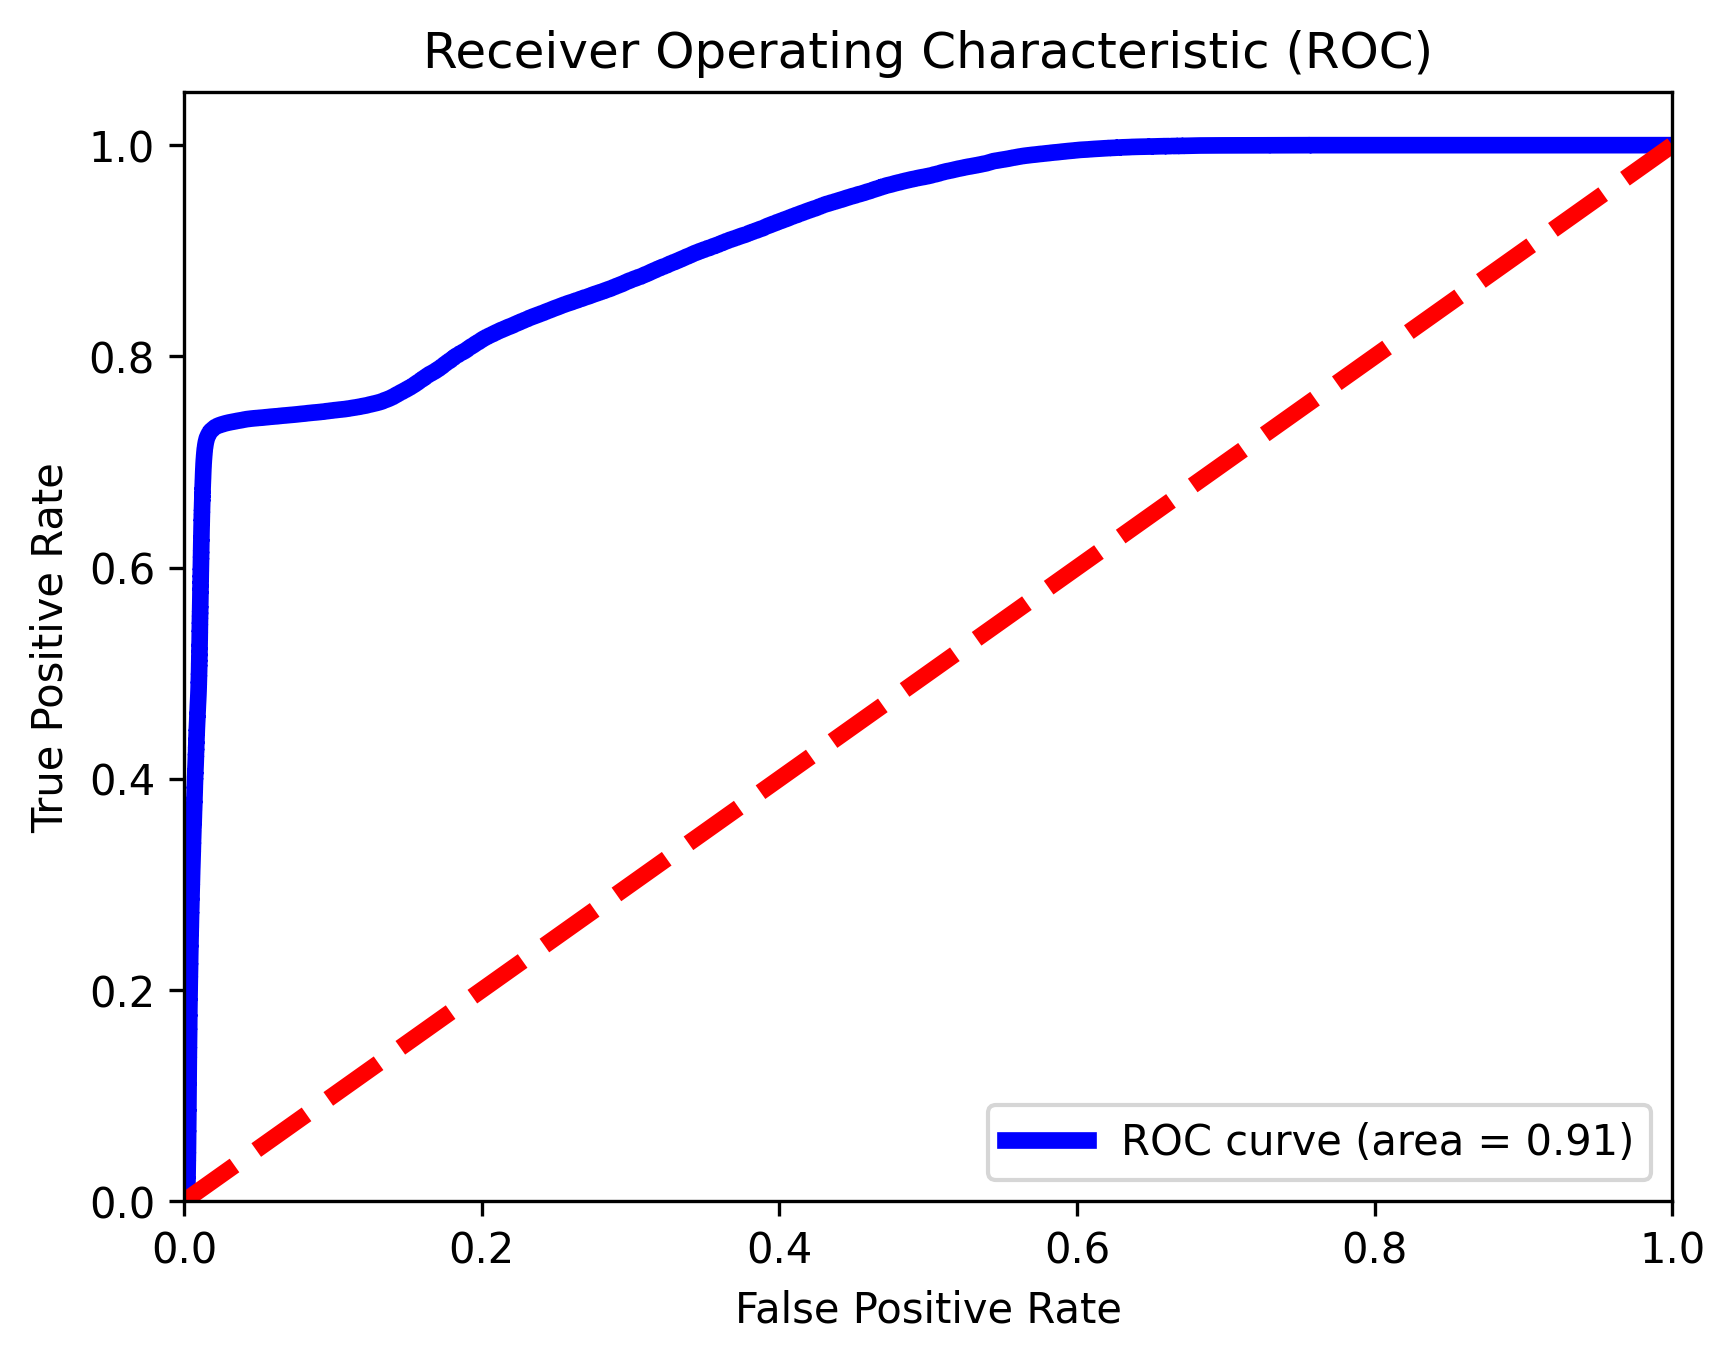

In [25]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc, accuracy_score


probs = logistic_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

plt.rcParams['font.family']='Times New Roman'
plt.figure( dpi=300)
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig("/Users/user/Documents/real world/roclr.png")
plt.show()

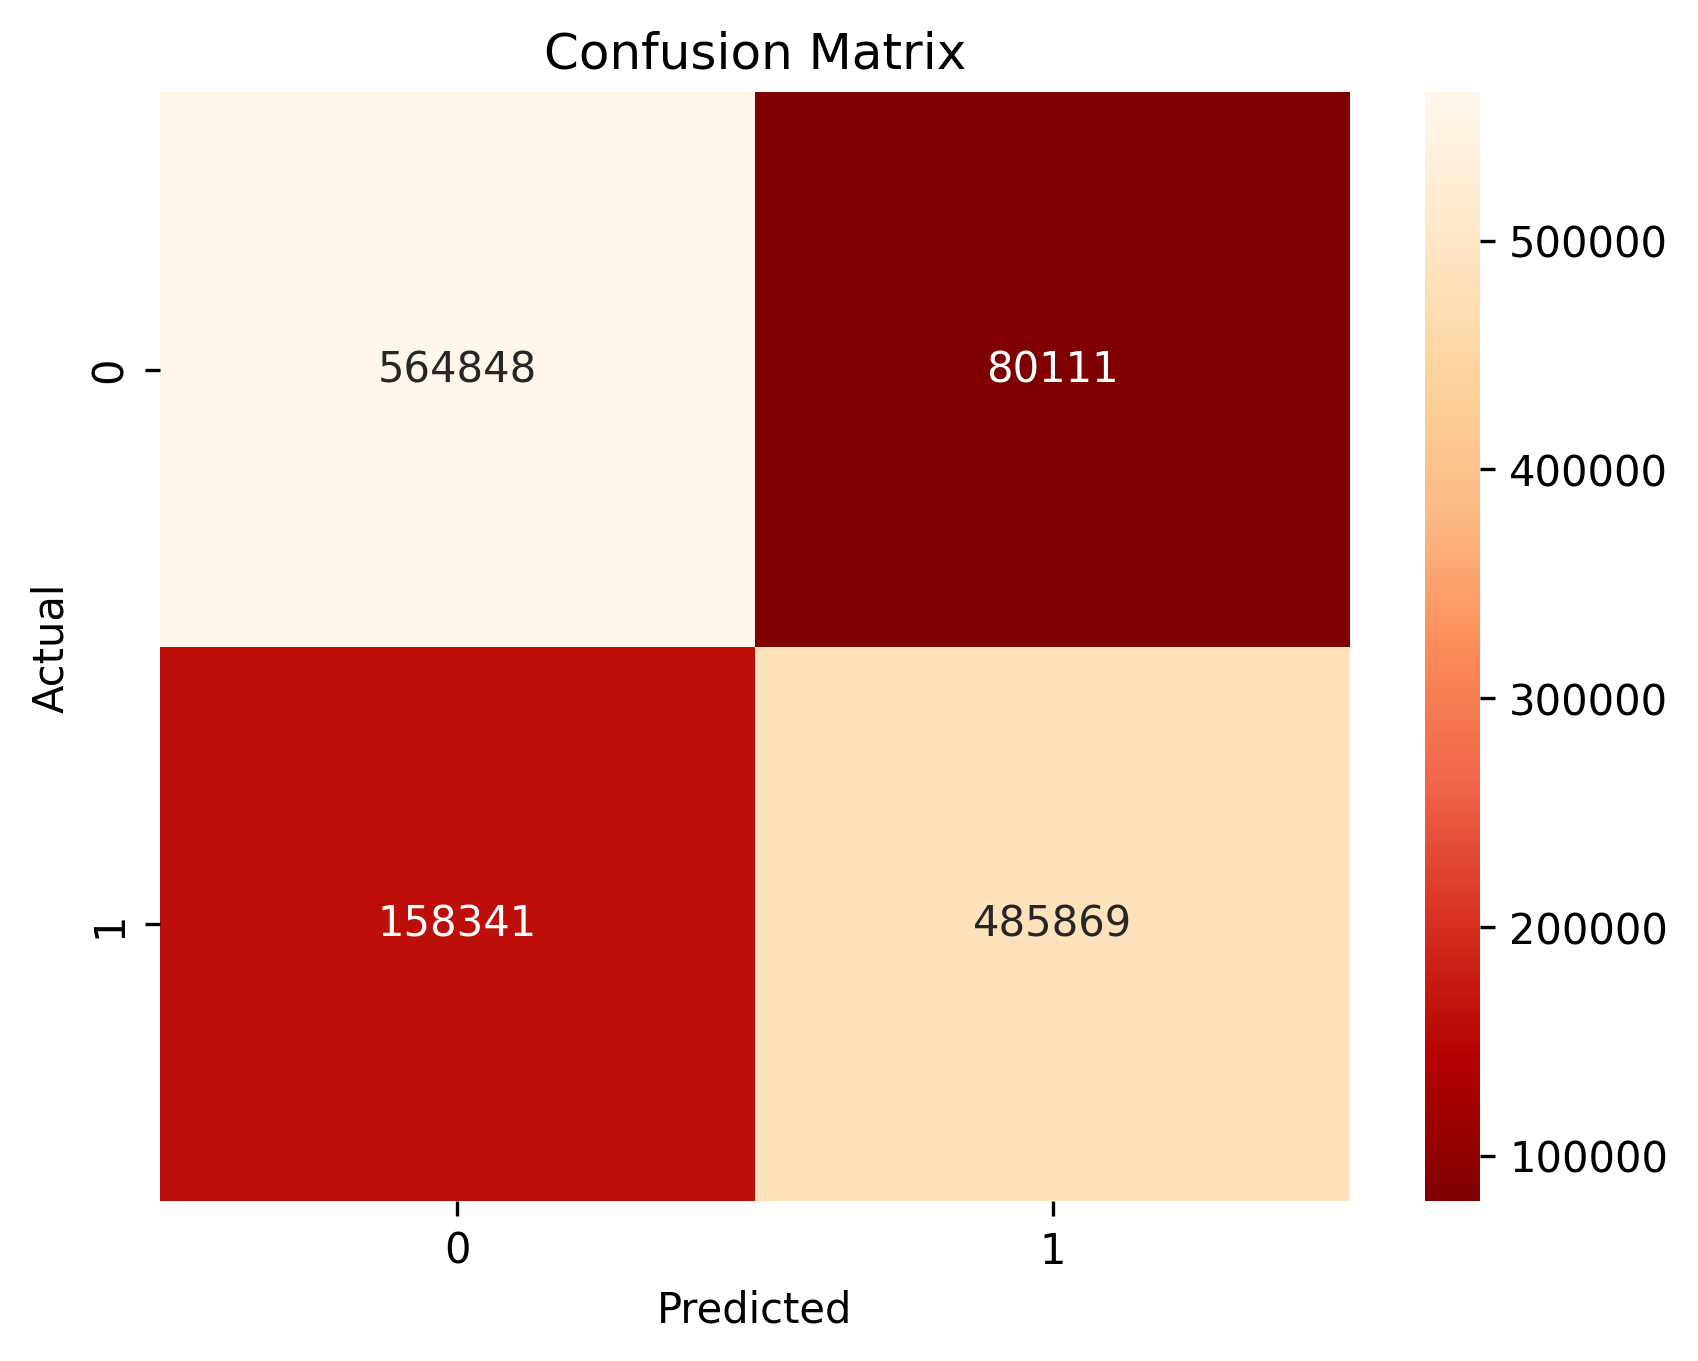

In [26]:
conf_matrix = confusion_matrix(y_validation,lg_predictions )
plt.figure(dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig("/Users/user/Documents/real world/cmlr.png")
plt.show()

In [27]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

In [29]:
# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)


In [30]:
# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 99.862%


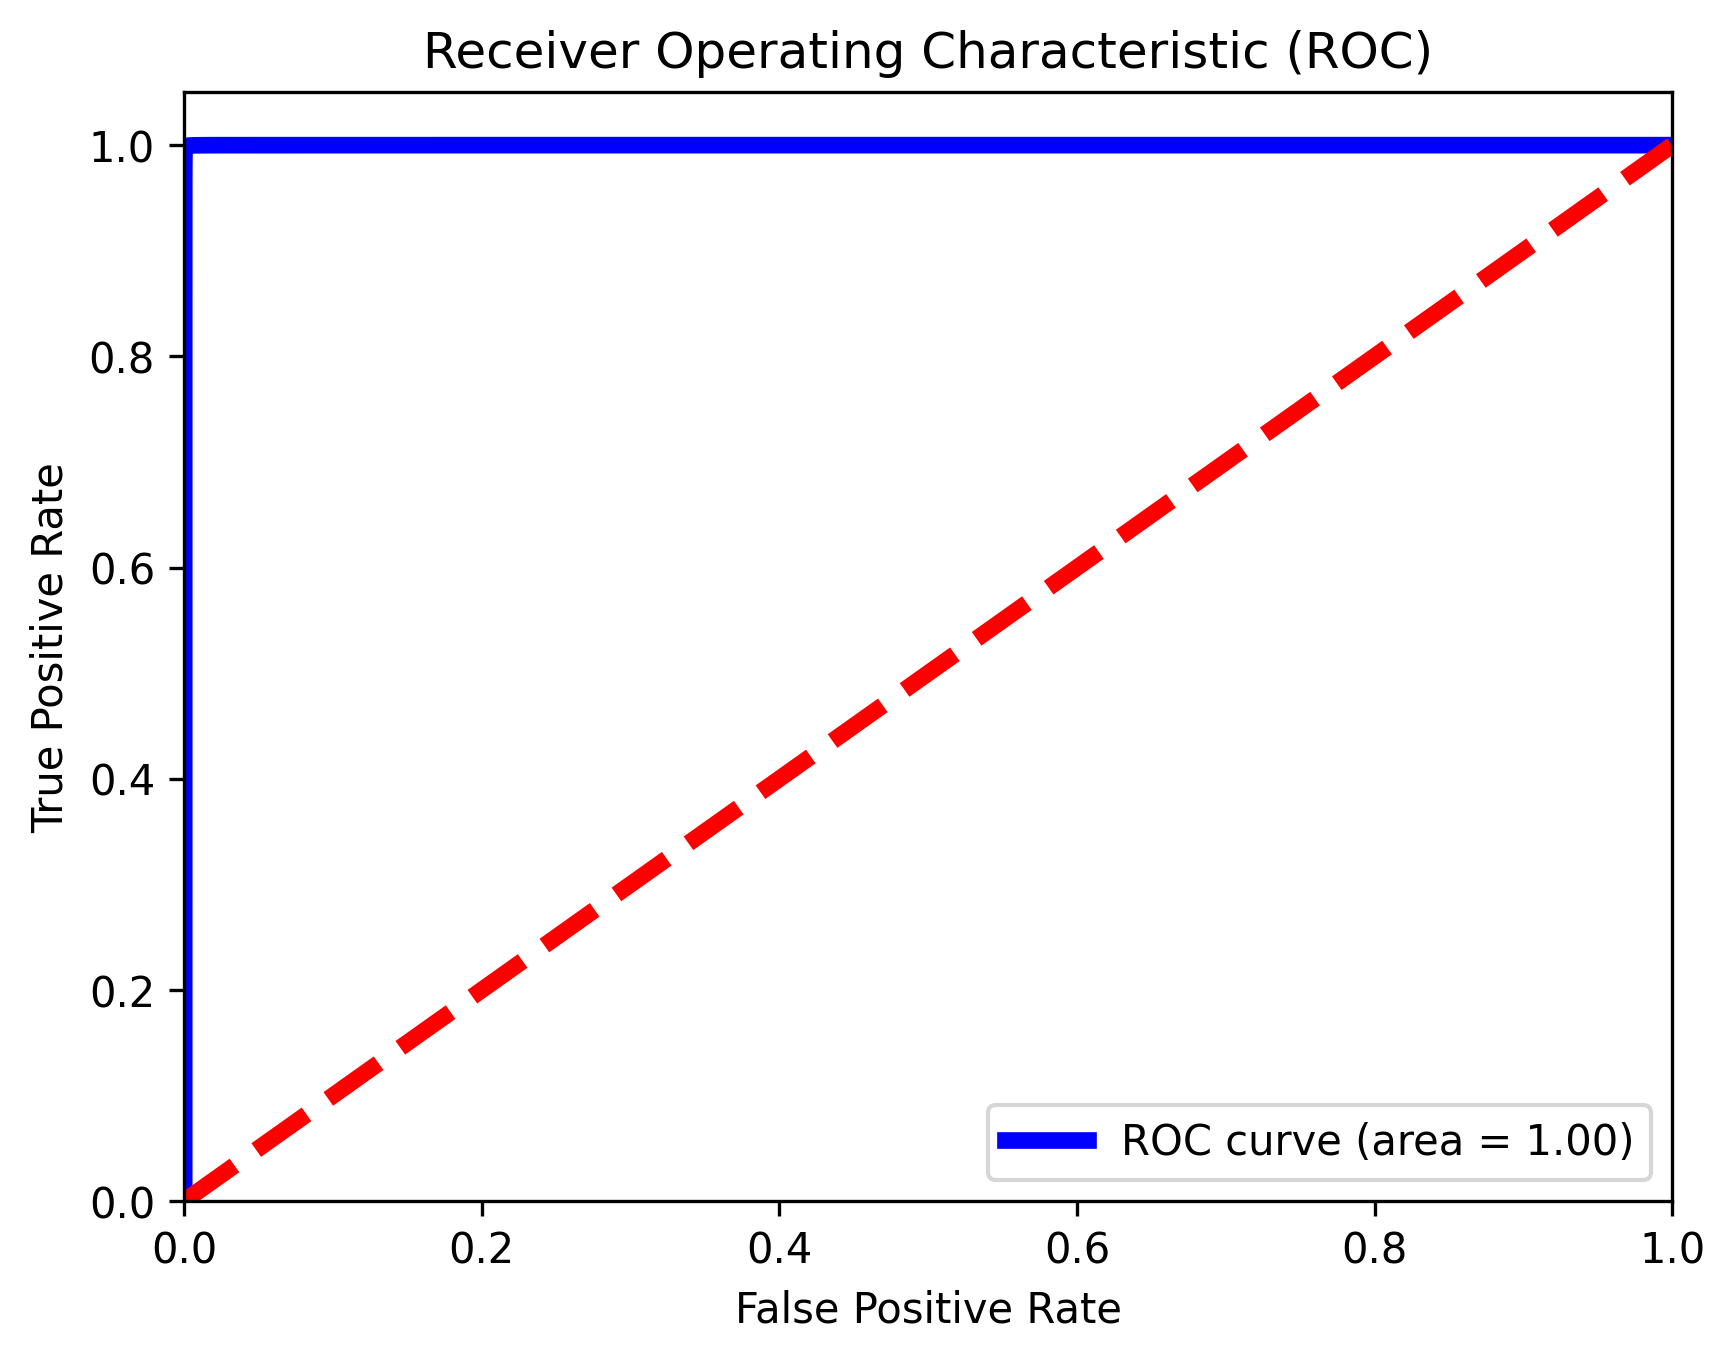

In [32]:

probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)


plt.figure(dpi=300)
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig("/Users/user/Documents/real world/rocrf.png")
plt.show()

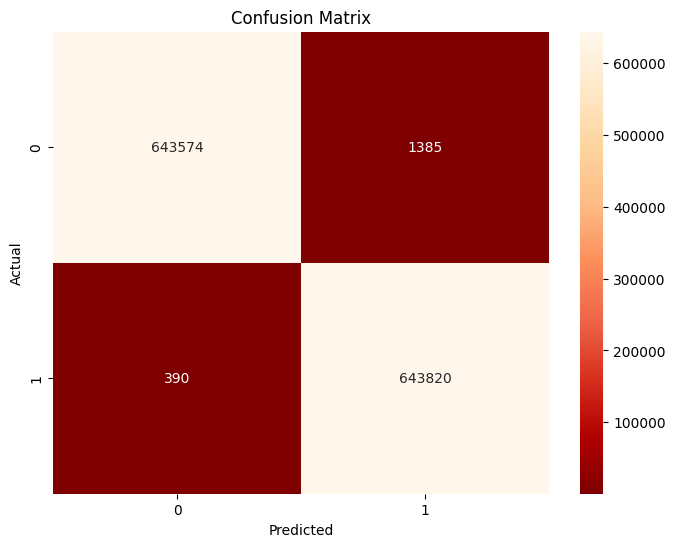

In [33]:

conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig("/Users/user/Documents/real world/cfrf.png")
plt.show()

In [34]:
from sklearn import tree

In [35]:
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(x_train, y_train)

In [36]:
# Make predictions on test data
dt_predictions = clf_dt.predict(x_validation)

In [37]:
# Calculate evaluation metrics on test data
dt_accuracy = accuracy_score(y_validation, dt_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Decision tree Accuracy: {:.3f}%".format(dt_accuracy * 100))

Decision tree Accuracy: 99.653%


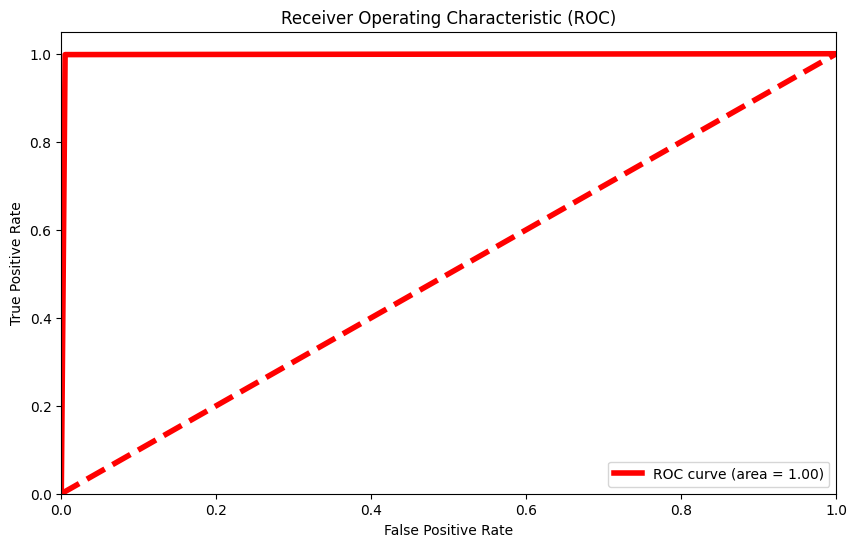

In [38]:
probs = clf_dt.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig("/Users/user/Documents/real world/rocdt.png")
plt.show()

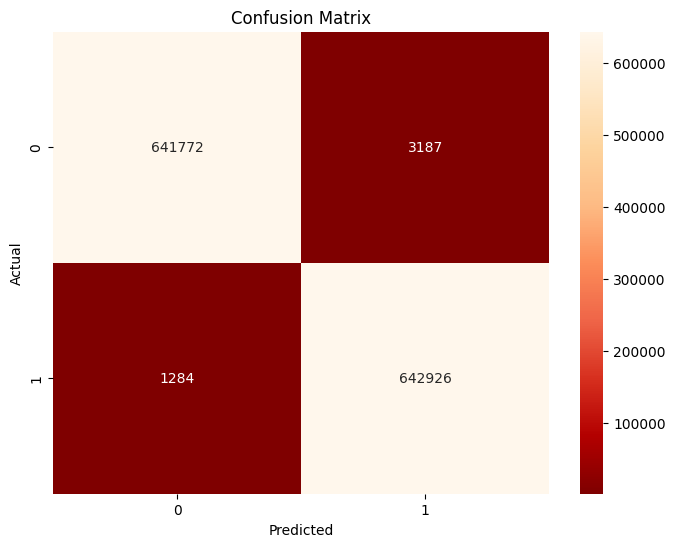

In [39]:

conf_matrix = confusion_matrix(y_validation, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig("/Users/user/Documents/real world/cfdt.png")
plt.show()

In [40]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(x_train, y_train)


In [42]:
xgboost_predictions = clf.predict(x_validation)

In [43]:
# Calculate evaluation metrics on test data
xgboost_accuracy = accuracy_score(y_validation, xgboost_predictions)
# Print evaluation metrics with 3 decimal places, multiplied by 100
print("XGB Accuracy: {:.3f}%".format(xgboost_accuracy * 100))

XGB Accuracy: 94.997%


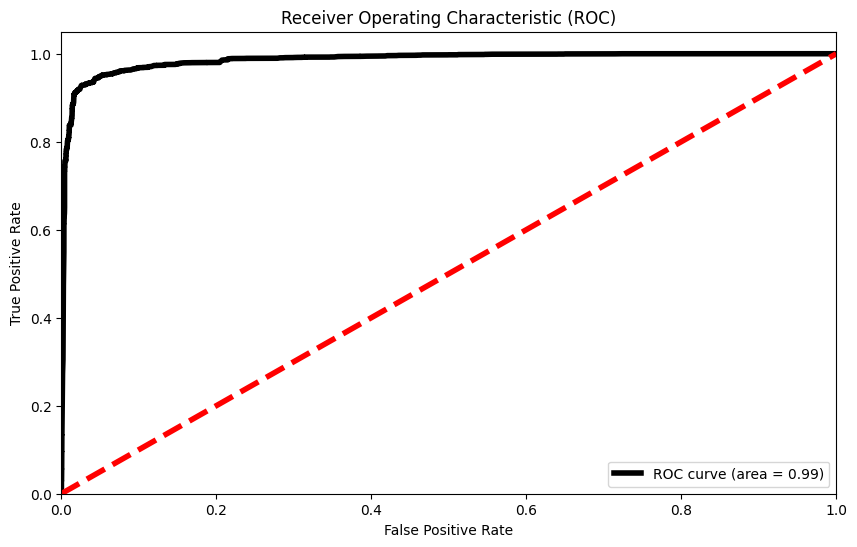

In [44]:
probs = clf.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='black', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig("/Users/user/Documents/real world/rocxgb.png")
plt.show()

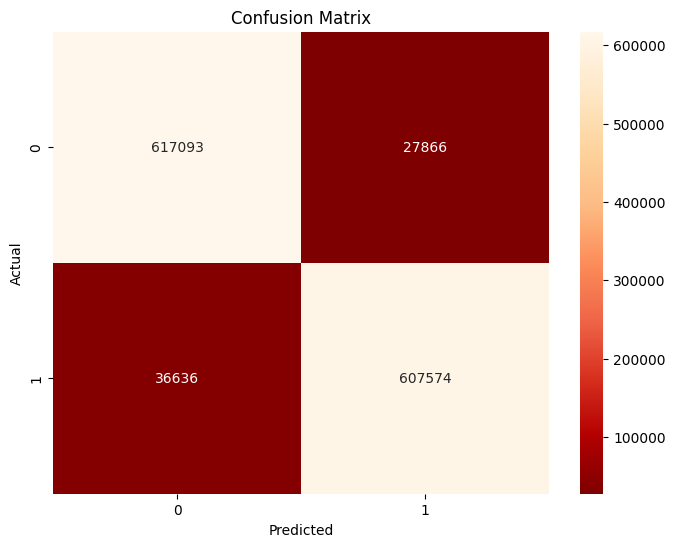

In [45]:

conf_matrix = confusion_matrix(y_validation, xgboost_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig("/Users/user/Documents/real world/cfxgb.png")
plt.show()

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [48]:
ann=clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [49]:
ann_predictions = ann.predict(x_validation)

In [50]:
ann_accuracy = accuracy_score(y_validation, ann_predictions)

# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Artificial Neural Network Accuracy: {:.2f}%".format(ann_accuracy*100 ))

Artificial Neural Network Accuracy: 91.26%


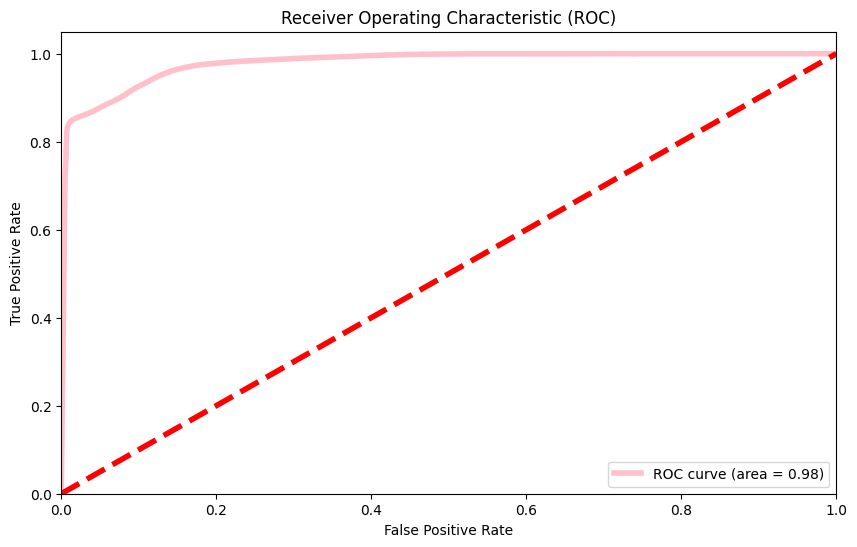

In [51]:
probs = ann.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='pink', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig("/Users/user/Documents/real world/rocann.png")
plt.show()

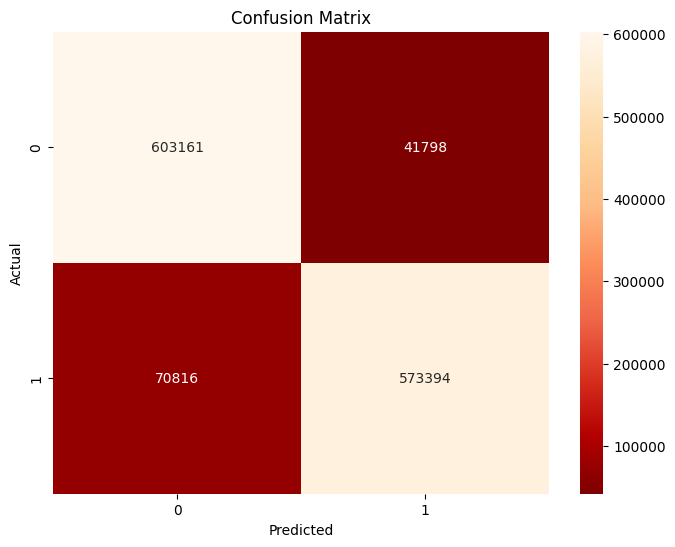

In [52]:

conf_matrix = confusion_matrix(y_validation, ann_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig("/Users/user/Documents/real world/cfann.png")
plt.show()

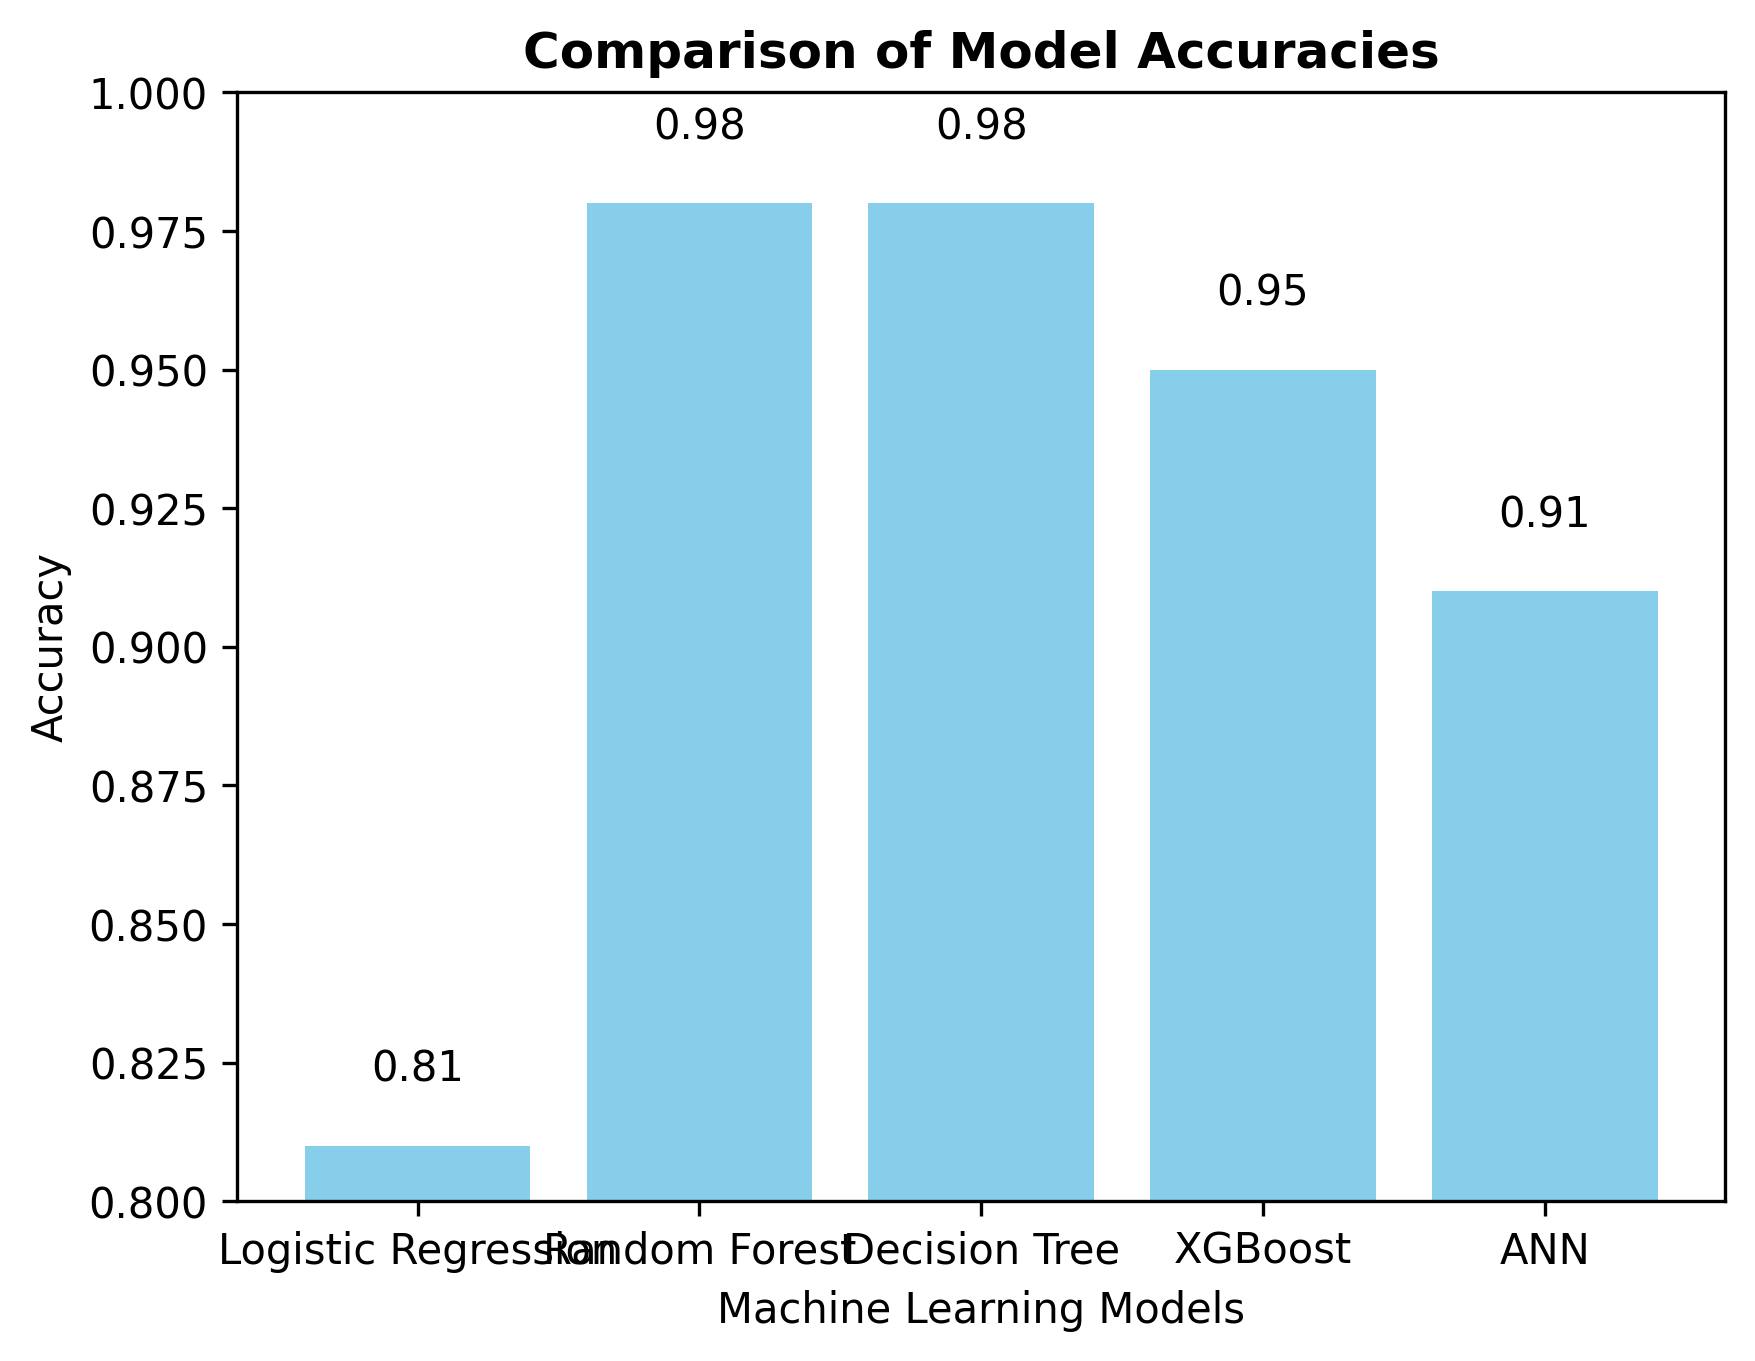

In [53]:
# Assuming we have accuracy scores for all models in a dictionary

# Replace these sample values with actual accuracies

model_accuracies = {
    'Logistic Regression': 0.81,
    'Random Forest': 0.98,
    'Decision Tree': 0.98,
    'XGBoost': 0.95,
    'ANN': 0.91
}

# Now we will plot a histogram comparing the accuracies
import matplotlib.pyplot as plt

# Names of the models
model_names = list(model_accuracies.keys())
# Corresponding accuracy scores
accuracies = list(model_accuracies.values())
plt.rcParams['font.family']='Times New Roman'
plt.figure(dpi=300)
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies', fontweight='bold')
plt.ylim(0.8, 1.0)  # Assuming accuracy scores are between 0.8 and 1.0
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

#plt.savefig("/Users/user/Documents/real world/all.png")

plt.show()
